<a href="https://colab.research.google.com/github/wranidlo/Autoencoder/blob/master/Autoencoder_Patryk_Bary%C5%82a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Patryk Baryła 
136216

# 2.1 Zarządzanie danymi

### 2.1.1 Import Bibliotek

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense 
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


## 2.1.2 Pobierz zbiór danych “digits” z biblioteki sklearn.

In [0]:
num_classes = 10

digits = datasets.load_digits(n_class=num_classes, return_X_y=False)

## 2.1.3 Wydrukuj informację o tym, z ilu obrazów składa się zbiór danych.

In [0]:
print("Zbiór danych składa się z ", digits.images.shape[0], "obrazów")

Zbiór danych składa się z  1797 obrazów


## 2.1.4 Ile pikseli przypada na każdy obraz, jaki kształt mają obrazy.

In [0]:
print("Na każdy obraz przypada ", digits.data.shape[1], "pikseli")
print("Obrazy mają wymiary ", digits.images.shape[1], " x ", 
      digits.images.shape[2])

Na każdy obraz przypada  64 pikseli
Obrazy mają wymiary  8  x  8


## 2.1.5 Korzystając z biblioteki matplotlib wydrukuj losowy obraz należący dokażdej z kategorii.

Przykłdadowa reprezentacja każdej cyfry


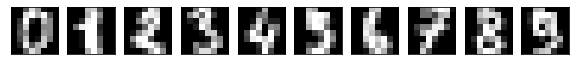

In [0]:
print("Przykłdadowa reprezentacja każdej cyfry")
plt.figure(figsize=(10, 2))
for i in range(0, 10):
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(digits.images[digits.target.tolist().index(i)])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.1.6 Korzystając z biblioteki matplotlib wydrukuj histogram liczby obrazów należących do danej kategorii.

Histogram rozkładu liczby obrazów reprezentujących daną cyfre


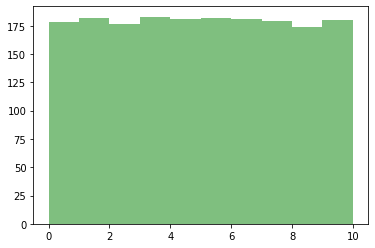

In [0]:
print("Histogram rozkładu liczby obrazów reprezentujących daną cyfre")
n, bins, patches = plt.hist(digits.target.tolist(), 10, range=(0, 10), 
                            facecolor='green', alpha=0.5)
plt.show()

# 2.2 Budowa prostej sieci neuronowej

## 2.2.1 Budowa modelu sieci

In [0]:
input_layer = Input(64)
dense_layer = Dense(10, activation = "softmax")(input_layer)

net_model = Model(inputs = input_layer, outputs = dense_layer)

## 2.2.2 Kompilacja sieci

In [0]:
net_model.compile(loss="mse", optimizer = Adam())

## 2.2.3 Uczenie sieci

In [0]:
#######
#Podział danych na zbiory uczące i testują, oraz przekształcenie danych
x = digits.images
y = digits.target

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train_reshaped = x_train.reshape(len(x_train),-1)
x_test_reshaped = x_test.reshape(len(x_test),-1)

#######
#Uczenie modelu
net_model.fit(x_train_reshaped,y_train,epochs=100,
              validation_data=(x_test_reshaped, y_test), verbose=0)

## 2.2.4 Testowanie sieci, która ma za zadanie rozpoznanie cyfr z obrazów

Testowanie modelu


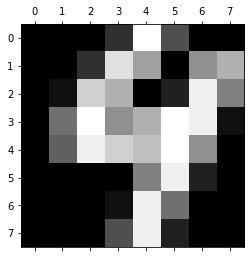

Przewidziana klasa  4
Prawdziwa  4


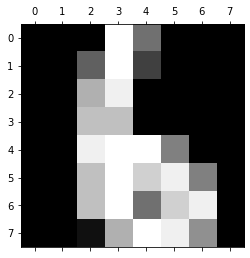

Przewidziana klasa  6
Prawdziwa  6


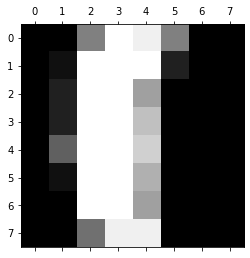

Przewidziana klasa  6
Prawdziwa  1


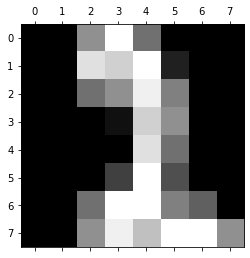

Przewidziana klasa  1
Prawdziwa  2


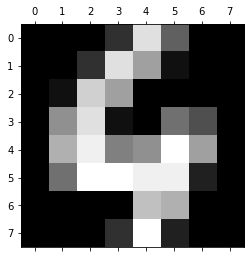

Przewidziana klasa  4
Prawdziwa  4


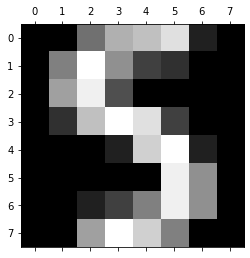

Przewidziana klasa  5
Prawdziwa  5


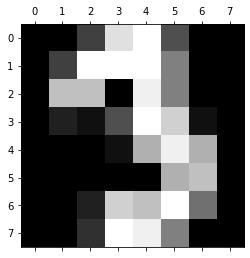

Przewidziana klasa  3
Prawdziwa  3


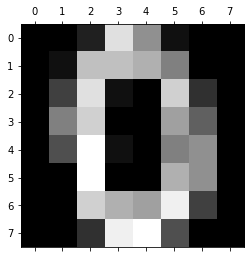

Przewidziana klasa  0
Prawdziwa  0


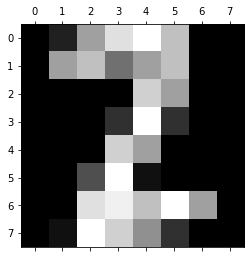

Przewidziana klasa  3
Prawdziwa  2


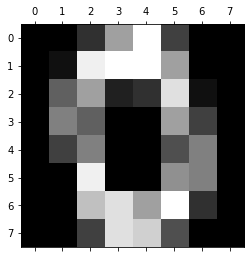

Przewidziana klasa  0
Prawdziwa  0


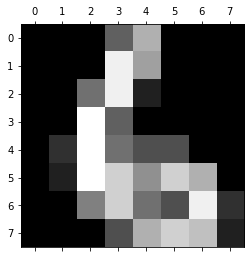

Przewidziana klasa  6
Prawdziwa  6


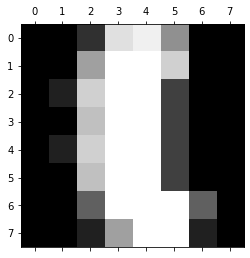

Przewidziana klasa  1
Prawdziwa  1


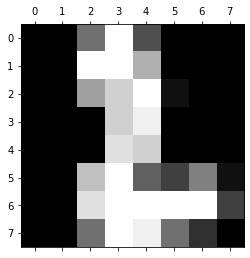

Przewidziana klasa  8
Prawdziwa  2


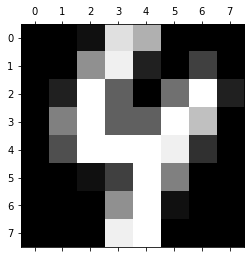

Przewidziana klasa  4
Prawdziwa  4


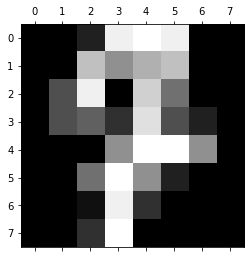

Przewidziana klasa  1
Prawdziwa  7


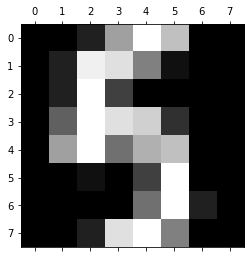

Przewidziana klasa  5
Prawdziwa  5


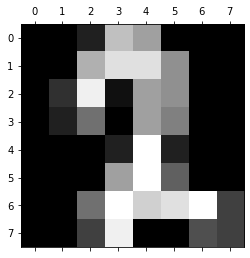

Przewidziana klasa  4
Prawdziwa  2


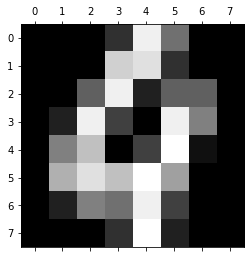

Przewidziana klasa  4
Prawdziwa  4


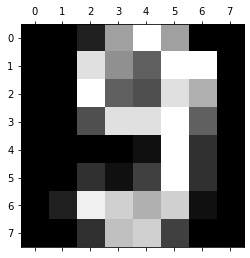

Przewidziana klasa  9
Prawdziwa  9


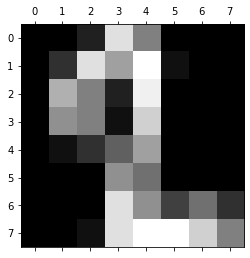

Przewidziana klasa  5
Prawdziwa  2


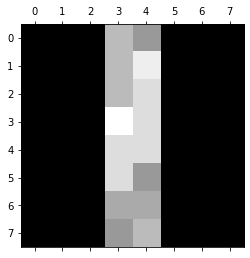

Przewidziana klasa  1
Prawdziwa  1


In [0]:
print("Testowanie modelu")
i=0
for e in x_test_reshaped:
  pre = net_model.predict(np.array([e]))
  plt.matshow(x_test[i]) 
  plt.show()
  print("Przewidziana klasa ", pre.argmax())
  print("Prawdziwa ", y_test[i].argmax())
  if i==20:
    break
  i+=1

# 2.3 Budowa Autoencodera

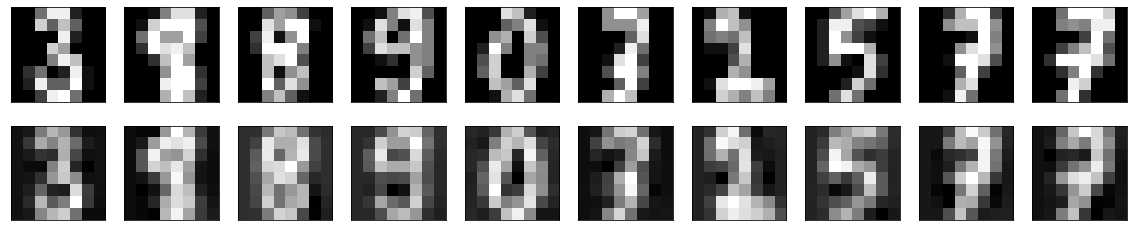

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import random

encoding_dim = 16

input = Input(64)
encoded = Dense(encoding_dim, activation='relu')(input)
decoded = Dense(64, activation='linear')(encoded)

#Autoencoder
autoencoder = Model(input, decoded)

#Encoder
encoder = Model(input, encoded)

#Decoder
encoded_input = Input(encoding_dim)
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(loss="mse", optimizer = Adam())


digits = datasets.load_digits(n_class=10, return_X_y=False)
x = digits.images
y = digits.target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)


autoencoder.fit(x_train, x_train,
                epochs=100,
                validation_data=(x_test, x_test), verbose=0)

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n=10
plt.figure(figsize=(20, 4))
for i in range(0, 10):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(8, 8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.4  Wykorzystanie elementów autoencodera

## 2.4.1 Posługując się dokumentacją biblioteki Keras wyodrębnij wagi każdej z warstw Twojego Autoencodera.

In [0]:
weights = autoencoder.get_weights()
for e in weights:
  print("Layer weights :", e)

Layer weights : [[ 0.0916996  -0.04339975  0.02598158 ... -0.14349677 -0.07053605
  -0.21597843]
 [-0.0079277  -0.06709017 -0.00642264 ... -0.03208409 -0.05963029
  -0.02356209]
 [ 0.02140678  0.03647389  0.04716788 ...  0.13994445 -0.14371914
   0.05589449]
 ...
 [ 0.42472622 -0.07531501  0.21329564 ... -0.14625214  0.1509232
  -0.03634981]
 [ 0.17669947 -0.04606657  0.28442553 ... -0.09112336  0.10061429
  -0.00326381]
 [ 0.01867325  0.00336102  0.11600491 ... -0.01403393  0.03554319
  -0.02812409]]
Layer weights : [-0.00876253  0.05593192  0.03674494 -0.06547134  0.08650187  0.05056166
  0.06004573  0.02841419  0.07157493  0.07612186  0.08748382  0.02670679
  0.0873066   0.04304277  0.08149351  0.03974083]
Layer weights : [[ 1.8849292e-04 -1.7392432e-03  2.9369686e-02 ...  4.8463506e-01
   1.6807118e-01  6.7706681e-03]
 [ 3.3110293e-05 -1.6389413e-02  2.8303247e-02 ... -1.0072893e-01
  -7.4221291e-02  6.1210822e-03]
 [ 9.0562411e-05 -3.5994512e-03  5.3153962e-02 ...  2.4711509e-01
 

## 2.4.2 Zbuduj sam decoder oraz sam encoder.

In [0]:
encoder = Model(input, encoded)
decoder_layer = autoencoder.layers[2]
decoder = Model(encoded_input, decoder_layer(encoded_input))

## 2.4.3 Posługując się samym encoderem skonstruuj zestaw zanużeń (embeddings) dla każdej z cyfr.

Przykładowy obraz


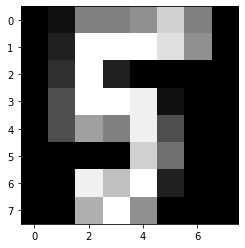

Zakodowany


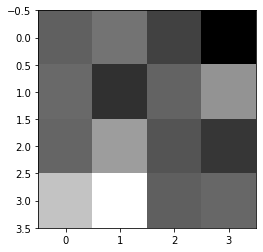

Odkodowany


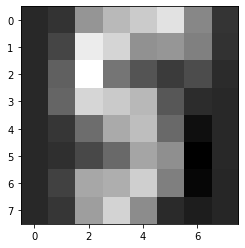

In [0]:
encoded_img = encoder.predict(x_train)
indexes = []
for i in range(0,10):
  index = np.argwhere(y_train==i)
  indexes.append(index)
embaddings = []
for i in range(0,10):
  emb = encoded_img[indexes[i]]
  embaddings.append(np.average(emb.reshape(len(emb),16),axis=0))

r = random.randrange(0,len(x_train))
print("Przykładowy obraz")
plt.imshow(x_train[r:r+1].reshape(8,8))
plt.show()
print("Zakodowany")
plt.imshow(encoded_img[r:r+1].reshape(4,4))
plt.show()
print("Odkodowany")
plt.imshow(decoder.predict(encoded_img[r:r+1]).reshape(8,8))
plt.show()

## 2.4.4 Posługując się zestawem zanużeń oraz dekoderem, skonstruuj narzędzie, które napisze na ekranie zadaną liczbę.

Działanie dla wszystkich cyfr


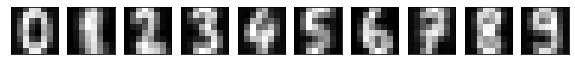

In [0]:
def get_number(i):
  return embaddings[i:i+1]

print("Działanie dla wszystkich cyfr")
plt.figure(figsize=(10, 2))
for i in range(0, 10):
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoder.predict(np.array(get_number(i))).reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.4.5 Rozszerz zestaw zanużeń o wartości statystyczne i skonstruuj narzędzie, którebędzie wykorzystywało zbudowane rozkłady do wprowadzania “losowości”do pisanych cyfr.

Działanie dla wszystkich cyfr po dodaniu losowości


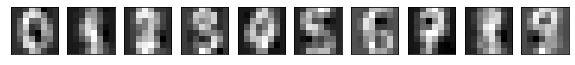

In [0]:
standard = []
for i in range(0,10):
  standard.append(np.std(embaddings,axis=0))

after_randomizing = []
for i in range(0,10):
  after_randomizing.append(np.random.normal(embaddings[i], standard[i]))

def get_number_rand(i):
  return after_randomizing[i:i+1]

print("Działanie dla wszystkich cyfr po dodaniu losowości")
plt.figure(figsize=(10, 2))
for i in range(0, 10):
    ax = plt.subplot(2, 10, i + 11)
    plt.imshow(decoder.predict(np.array(get_number_rand(i))).reshape(8,8))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()